# Linear regression
The goal of regression is to perform predictions of continuous values using a trained model. We want to find a relationship between one or multiple features and a specific output variable we call 'y'. 

This relationship is a multidimensional curve in the shape of $y=\theta_nX_n+...\theta_1X_1+\theta_0$. The vector X is the set of features and the set $\theta$ are called the parameters.

The goals of this exercise are:
* Read in data and process it using the pandas library
* Perform simple statistic analyses on the data to detect inconsistencies of the data and see correlations between features and/or target
* Correctly splitting data in a training and test set
* The ability to normalize data
* Training a regression model
* Evaluating a regression model
* Detect over- and underfitting
* Apply L1 and L2 regularisation to prevent over- and underfitting


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt                                             # To create plots
import seaborn as sns                                                       # Make seaborn plots
import numpy as np                                                          # To perform calculations quickly
import pandas as pd                                                         # To load in and manipulate data
from sklearn.linear_model import LinearRegression, Lasso, Ridge             # Built in datasets and linear models
from sklearn.model_selection import train_test_split                        # Splitting in train and test set
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # Metrics used to test the model
from sklearn.metrics import roc_curve                                       # Used to create ROC_curve
from sklearn.preprocessing import PolynomialFeatures                        # Used to construct higher order features
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler # Different scalers that can be used

## Life expectancy
The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website.

More information: https://www.kaggle.com/augustus0498/life-expectancy-who

**Metadata**
* Country - Country
* Year - Year
* Status - Developed or Developing status
* Lifeexpectancy - Life Expectancy in age
* AdultMortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* infantdeaths - Number of Infant Deaths per 1000 population
* Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* percentageexpenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* HepatitisB - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Measles - Measles - number of reported cases per 1000 population
* BMI - Average Body Mass Index of entire population
* under-fivedeaths - Number of under-five deaths per 1000 population
* Polio - Polio (Pol3) immunization coverage among 1-year-olds (%)
* Totalexpenditure - General government expenditure on health as a percentage of total government expenditure (%)
* Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* HIV/AIDS - Deaths per 1 000 live births HIV/AIDS (0-4 years)
* GDP - Gross Domestic Product per capita (in USD)
* Population - Population of the country
* thinness1-19years - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* thinness5-9years - Prevalence of thinness among children for Age 5 to 9(%)
* Incomecompositionofresources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Schooling - Number of years of Schooling(years)

In [3]:
# Read the dataset from csv
# Load in the data
data = pd.read_csv("data/led.csv")
# Show first 10 rows of the dataframe
data.head(10)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
# Show the number of rows and columns in the df (the shape of the df)
print("rows, columns", data.shape)
# Summarize the dataframe (describe)
data.describe()

rows, columns (2938, 22)


,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
# inplace = True -- > The actual data will be removed. 
# axis = 1 -- > Column
# axis = 0 -- > Row
# Due to a lot of missing data in the Population column, we will remove this column
data.drop("Population",axis=1,inplace=True)
# Also remove the Country column
data.drop("Country",axis=1,inplace=True)
# Show columns 
data.columns

Index(['Year', 'Status', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths',
       'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'thinness1-19years', 'thinness5-9years',
       'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [6]:
# Remove all rows with NA values (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
# data.dropna() -- > Also good
data.dropna(how="any", inplace=True)
# Take a new look at the shape of the df (to see if/how many rows were removed)
data.shape

(1853, 20)

In [7]:
# Take a look at all possible values of the status column
# Hint: use the "unique" function from pandas 
# Convert the dictionary/csv into DataFrame 
df = pd.DataFrame(data)
# Get the unique values of 'Status' column
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [8]:
# Based on the information above: replace the possible values with 0 and 1
# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
# Take a look at dict-like replacement
# OR inplace = True
#df = df.replace({'Status': 'Developing'}, 0) 
#df = df.replace({'Status': 'Developed'}, 1)
df.Status.replace({'Developing': 0, 'Developed': 1}, inplace = True)

In [9]:
df.Status.unique()

array([0, 1], dtype=int64)

In [10]:
# Remove outliers based on the zscore
# zscore gives you the number of standard deviations difference between the value and the mean value of the column
# In this example: remove outliers that are more than 5 standard deviations (z-score > 5) from the mean

# Use the following function to determine the zscore for each value
from scipy.stats import zscore

# Remove the outliers (example code)
data_no_outliers = df[(zscore(df)<=5).all(axis=1)]

# Take a look at the new shape of the dataframe
data_no_outliers.shape

(1776, 20)

<Axes: >

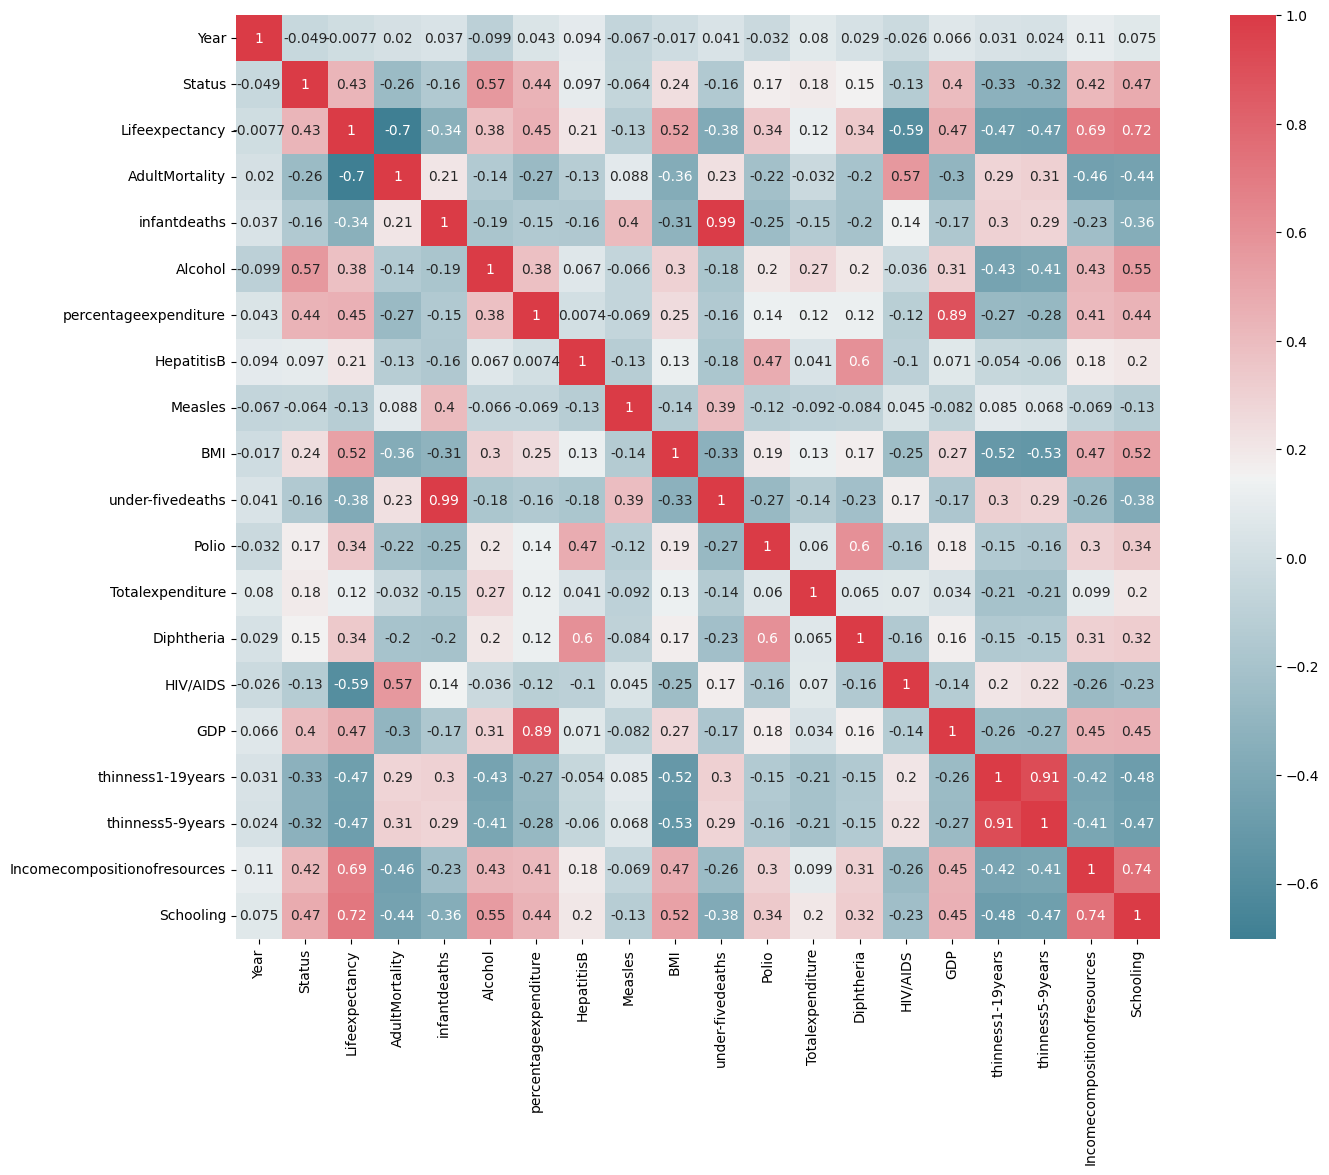

In [11]:
# Look at the correlations between multiple features by displaying a correlation plot (in heatmap form)
import seaborn as sns
# Visualize correlations
f, ax = plt.subplots(figsize=(18, 12))
corr = data_no_outliers.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
# Formulate a few conclusions based on this plot.
# Which features have a strong correlation with Lifeexpactancy
# Which features are strongly correlated between each other
# Under-fivedeahs & infantdeath

# If you had to remove a few features, which ones would you choose and why?
# Under-fivedeahs or infantdeath since they are practically the same
# Can look at a really low corelation/close to 0 and maybe remove that since it is less necassary to compare.

In [12]:
# Also take a look at the pairplot between features. (Takes some time to generate)
#sns.pairplot(data_no_outliers)


#Formulate a few conclusions based on this plot
# Can delete coloms that have a very nice correlation, even in a positive or negative trends.
# Then the information is almost the same and can delete those columns.

In [13]:
# Split the data into features and targets
features = data_no_outliers.drop("Lifeexpectancy",axis=1)
targets = data_no_outliers["Lifeexpectancy"]


In [27]:
# Create dummy columns for the Year column
# This because we would like the Year column to be treated as a categorical column
# Take a look at https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
# Specify the year column with columns=["Year"] parameter
year_columns = pd.get_dummies(features, columns=["Year"])


In [28]:
year_columns.columns

Index(['Status', 'AdultMortality', 'infantdeaths', 'Alcohol',
       'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'thinness1-19years', 'thinness5-9years',
       'Incomecompositionofresources', 'Schooling', 'Year_2000', 'Year_2001',
       'Year_2002', 'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006',
       'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015'],
      dtype='object')

In [16]:
#year_columns_e = pd.get_dummies(features.Year)
#df = pd.concat([df, year_columns_e], axis=1)

In [29]:
# Take a look at the first rows of the features df
year_columns.head(10)

,Status,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,...,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
0,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,1,0
2,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,1,0,0
3,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,1,0,0,0
4,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,1,0,0,0,0
5,0,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,...,0,0,0,0,1,0,0,0,0,0
6,0,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,...,0,0,0,1,0,0,0,0,0,0
7,0,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,...,0,0,1,0,0,0,0,0,0,0
8,0,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,...,0,1,0,0,0,0,0,0,0,0
9,0,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,...,1,0,0,0,0,0,0,0,0,0


In [39]:
# Split the data into a training and a test set
# Take about 20% of the data as test set
X_train, X_test, y_train, y_test = train_test_split(year_columns, targets, test_size=0.2)

In [40]:
# Create a linear regression model and fit the data
# Create an empty model
lregmodel=LinearRegression()
lregmodel.fit(X_train,y_train)

print(f"The train model score: {lregmodel.score(X_train, y_train)}")
print(f"The test model score: {lregmodel.score(X_test, y_test)}")

The train model score: 0.810907699413377
The test model score: 0.8348648337252801


In [41]:
# Predict new values for the test set
y_pred_train = lregmodel.predict(X_train)
y_pred = lregmodel.predict(X_test)

In [42]:
print([round(y,1) for y in y_pred[0:5]])
print(list(y_test[0:5]))

[74.0, 68.8, 67.5, 79.8, 79.1]
[73.4, 73.0, 66.2, 82.6, 79.3]


In [43]:
# Evaluate the model using mean absolute error, mean squared error, R2
# Check to see if you have under- or overfitting by also calculating these scores for the training set
print("Training set",mean_absolute_error(y_train, y_pred_train))
print("Test set", mean_absolute_error(y_test, y_pred))
print("Test set", mean_squared_error(y_test, y_pred))
# Formulate a conclusion based on this model, is this a good model, over or underfitted?


Training set 2.6810934188051934
Test set 2.611003567674489
Test set 11.590242156150364


## Model optimalisation
Until now we did not do any optimizations like normalization or regularization.

Try different regularization techniques (Ridge/Lasso), play also with the alpha levels of the model.

In [ ]:
# Try different possibilities yourself

### Also try around with higher order features

In [ ]:
# Add in some higher order features and train some models